__Objective - To predict the profit made by a startup on the basis of expenses incurred and the state where they operate.__

In [46]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [47]:
# Importing the dataset
dataset = pd.read_csv("50_Startups.csv")

In [48]:
# Let's have a look at the dataset
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [49]:
# Let's have a look at the shape of the dataset.
print("The dataset has", dataset.shape[0], "rows and", dataset.shape[1], "columns.")

The dataset has 50 rows and 5 columns.


In [50]:
# Let's see if there are null values in this dataset.
dataset.isnull().value_counts()

R&D Spend  Administration  Marketing Spend  State  Profit
False      False           False            False  False     50
dtype: int64

There are no null values in this dataset.

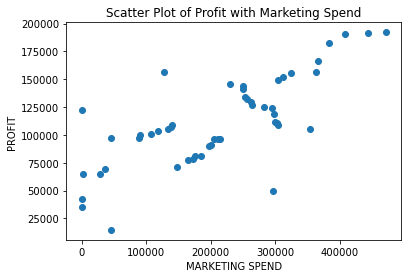

In [51]:
# Our target variable is Profit.
# So, let's plot a scatter plot of target variable with other independent variables to know the correlation.

plt.scatter(dataset['Marketing Spend'], dataset['Profit'])
plt.title("Scatter Plot of Profit with Marketing Spend")
plt.xlabel("MARKETING SPEND")
plt.ylabel("PROFIT")
plt.show()

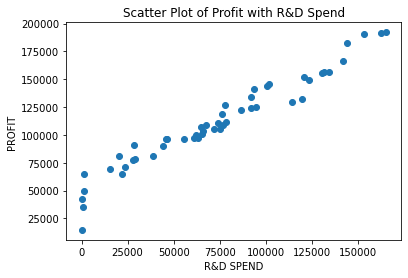

In [52]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'])
plt.title("Scatter Plot of Profit with R&D Spend")
plt.xlabel("R&D SPEND")
plt.ylabel("PROFIT")
plt.show()

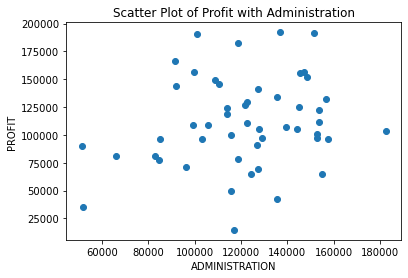

In [53]:
plt.scatter(dataset['Administration'], dataset['Profit'])
plt.title("Scatter Plot of Profit with Administration")
plt.xlabel("ADMINISTRATION")
plt.ylabel("PROFIT")
plt.show()

Text(0, 0.5, 'AVERAGE PROFIT')

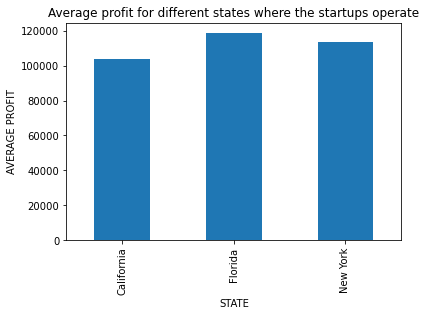

In [54]:
# Now, Let's have a look at the Average profit for different states where the startups operate.

figure = dataset.groupby(['State'])['Profit'].mean().plot.bar()
figure.set_title("Average profit for different states where the startups operate")
figure.set_xlabel("STATE")
figure.set_ylabel("AVERAGE PROFIT")

In [55]:
# Let's have a look at the count of no. of startups each state has.
print("Number of startups in each state - \n", dataset.State.value_counts())

Number of startups in each state - 
 California    17
New York      17
Florida       16
Name: State, dtype: int64


In [56]:
# Let's Label Encode States to convert it into numerical from.
le = LabelEncoder()

dataset.State = le.fit_transform(dataset.State)

In [57]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [58]:
# So, now when we look at the data it seems that every column has a different scale.
# Let's check it 
dataset.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [59]:
# Let's label our dependent and independent variables.

X = dataset.drop(columns='Profit') # independent variables
Y = dataset.Profit # dependent variables

In [60]:
X.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')

In [61]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [62]:
# Splitting the dataset into training and test data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 0)

In [68]:
# Transforming the data
scaler = MinMaxScaler()

dataset = scaler.fit_transform(dataset)
dataset[:10]

array([[1.        , 0.65174393, 1.        , 1.        , 1.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.        , 0.99735461],
       [0.92798459, 0.37957895, 0.8646636 , 0.5       , 0.99317808],
       [0.87313643, 0.51299839, 0.81223513, 1.        , 0.94729239],
       [0.85943772, 0.30532804, 0.77613557, 0.5       , 0.85317138],
       [0.797566  , 0.3694479 , 0.76912588, 1.        , 0.80138177],
       [0.81412828, 0.73016111, 0.27071031, 0.        , 0.79649041],
       [0.7880179 , 0.71745725, 0.68649342, 0.5       , 0.79440736],
       [0.72901786, 0.74173276, 0.66049977, 1.        , 0.77446805],
       [0.74590551, 0.43692884, 0.64644319, 0.        , 0.7606613 ]])

In [64]:
# Fitting the Multiple Linear Regression to the training set.
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [65]:
# Predicting the test set results.
Y_pred = regressor.predict(X_test)

In [66]:
# Computing the RMSE.
math.sqrt(mean_squared_error(Y_test, Y_pred))

8530.541916373628

In [67]:
# Computing the score.
regressor.score(X_test, Y_test)

0.9325447894242298

__The model fits well with a score of 0.93.__